# Regresión Logística: Predicción de Contratación Laboral

En este ejercicio, implementaremos un modelo de **regresión logística** para predecir si un candidato será contratado en una empresa, basándonos en dos factores clave:

1. **Evaluación Técnica**: Puntaje obtenido en una prueba de habilidades técnicas (0-100 puntos).
2. **Habilidades Blandas**: Puntaje en competencias interpersonales como comunicación y trabajo en equipo (0-50 puntos).

## Contexto del Problema
Como responsable de Recursos Humanos, deseamos **automatizar la preselección de candidatos**...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

# URL correcta (formato raw)
url = 'https://raw.githubusercontent.com/Carlos01rondon/Ejercicio-Machine-Lerarning-2/main/Datos/datos2_1.txt'

# Leer el archivo
df = pd.read_csv(url, sep=",", header=None)
df.columns = ['Examen_Programacion', 'Examen_Algoritmos', 'Contratado']
df.head()

,Examen_Programacion,Examen_Algoritmos,Contratado
0,Examen_Programacion,Examen_Algoritmos,Contratado
1,72,65,1
2,58,60,0
3,85,78,1
4,63,55,0


In [3]:
print(df.dtypes)


Examen_Programacion    object
Examen_Algoritmos      object
Contratado             object
dtype: object


In [4]:
df['Examen_Programacion'] = pd.to_numeric(df['Examen_Programacion'], errors='coerce')
df['Examen_Algoritmos'] = pd.to_numeric(df['Examen_Algoritmos'], errors='coerce')

In [5]:
# Si 'contratado' es una columna categórica (como sí/no), necesitas convertirla a numérica primero
if 'contratado' in df.columns and df['contratado'].dtype == 'object':
    df['contratado'] = df['contratado'].map({'si': 1, 'no': 0})  # o tu mapeo correspondiente

# Ahora genera el describe transpuesto
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Examen_Programacion,30.0,NaN,NaN,NaN,71.666667,14.575211,45.0,60.25,71.0,82.75,97.0
Examen_Algoritmos,30.0,NaN,NaN,NaN,69.6,13.026763,50.0,59.25,69.0,78.0,95.0
Contratado,31,3,1,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


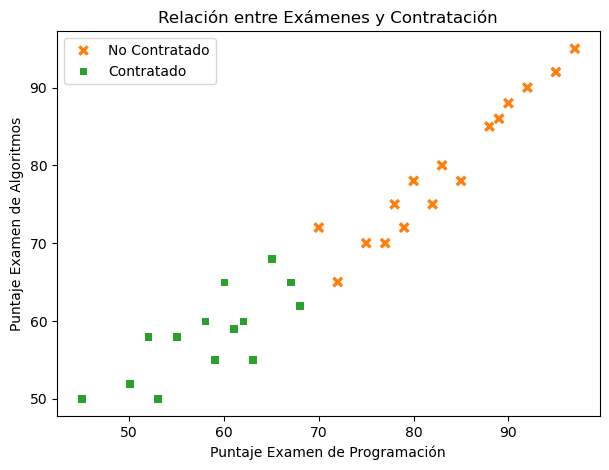

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='Examen_Programacion', 
                     y='Examen_Algoritmos', 
                     hue='Contratado', 
                     data=df, 
                     style='Contratado', 
                     s=80)

# Personalizar la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['No Contratado', 'Contratado'])  # Ajusta según tus valores

plt.title('Relación entre Exámenes y Contratación')
plt.xlabel('Puntaje Examen de Programación')
plt.ylabel('Puntaje Examen de Algoritmos')
plt.show()

In [7]:
from IPython.display import display, Markdown, Math

# Texto con formato y ecuaciones en negrita
display(Markdown("""
### 1.2 Implementación

#### 1.2.1  Función Sigmoid

Hipótesis de regresión logística:
"""))

# Ecuaciones en negrita usando \mathbf
display(Math(r'\mathbf{h_\theta(x) = g(\theta^T x)}'))
display(Math(r'\mathbf{g(z) = \frac{1}{1 + e^{-z}}}'))


### 1.2 Implementación

#### 1.2.1  Función Sigmoid

Hipótesis de regresión logística:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

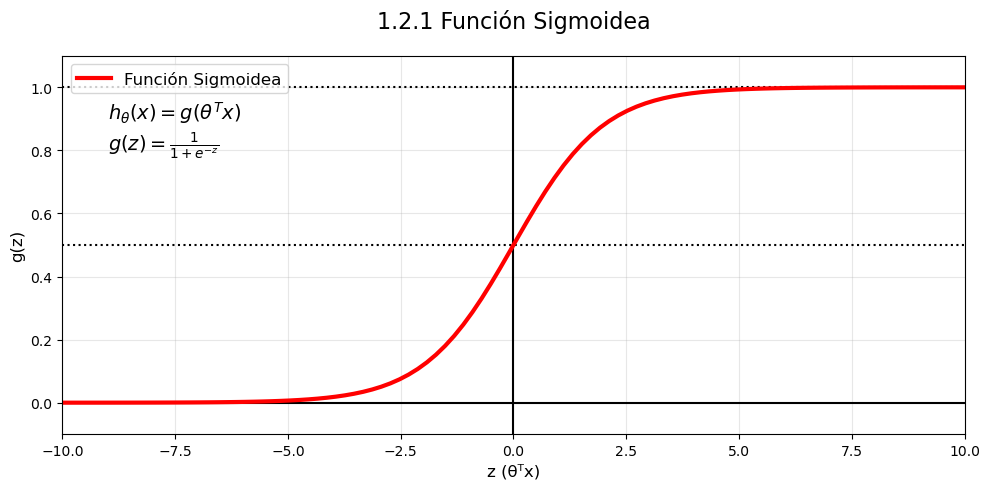

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos la función sigmoidea
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generamos valores para z
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

# Configuración del gráfico
plt.figure(figsize=(10, 5))

# Líneas de referencia
plt.plot([-10, 10], [0, 0], "k-")  # Eje horizontal
plt.plot([-10, 10], [0.5, 0.5], "k:")  # Línea punteada en 0.5
plt.plot([-10, 10], [1, 1], "k:")  # Línea punteada en 1.0
plt.plot([0, 0], [-0.1, 1.1], "k-")  # Eje vertical

# Curva sigmoidea
plt.plot(z, sig, "r-", linewidth=3, label='Función Sigmoidea')

# Personalización
plt.title("1.2.1 Función Sigmoidea", fontsize=16, pad=20)
plt.xlabel("z (θᵀx)", fontsize=12)
plt.ylabel("g(z)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis([-10, 10, -0.1, 1.1])

# Ecuaciones (texto en el gráfico)
plt.text(-9, 0.9, r'$h_\theta(x) = g(\theta^T x)$', fontsize=14)
plt.text(-9, 0.8, r'$g(z) = \frac{1}{1+e^{-z}}$', fontsize=14)

plt.tight_layout()
plt.show()

In [10]:
from IPython.display import display, Markdown, Math

# Texto completo en español con formato Markdown y ecuaciones
display(Markdown(r"""
#### 1.2.2 Función de Costo y Gradiente

La función de costo en regresión logística es:
"""))

# Ecuaciones renderizadas
display(Math(r'J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))]'))

display(Markdown(r"""
Implementación vectorizada: $h = g(X\theta)$ que traduce a:
"""))

display(Math(r'J(\theta) = \frac{1}{m} \left(-y^T \log(h) - (1 - y)^T \log(1 - h)\right)'))

display(Markdown(r"""
El gradiente del costo es un vector de la misma longitud que $\theta$ donde el $j^{ésimo}$ elemento (para $j = 0, 1, \ldots, n$) se define como:
"""))

display(Math(r'\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left((h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}\right)'))

display(Markdown(r"""
**Forma vectorizada:**
"""))

display(Math(r'\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (g(X\theta) - y)'))


#### 1.2.2 Función de Costo y Gradiente

La función de costo en regresión logística es:


<IPython.core.display.Math object>


Implementación vectorizada: $h = g(X\theta)$ que traduce a:


<IPython.core.display.Math object>


El gradiente del costo es un vector de la misma longitud que $\theta$ donde el $j^{ésimo}$ elemento (para $j = 0, 1, \ldots, n$) se define como:


<IPython.core.display.Math object>


**Forma vectorizada:**


<IPython.core.display.Math object>

In [11]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #truco para hacer que Numpy minimice el trabajo
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

In [12]:
import numpy as np
import pandas as pd

# 1. Datos de ejemplo (reemplaza esto con tu DataFrame real)
data = {
    'Examen_Programacion': [78, 92, 85, 65, 88, 72, 95, 69, 83, 91],
    'Examen_Algoritmos': [89, 87, 90, 65, 92, 75, 96, 70, 85, 88],
    'Contratado': [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)

# 2. Preparación de datos
m = df.shape[0]
X = np.hstack([np.ones((m, 1)), df[['Examen_Programacion', 'Examen_Algoritmos']].values])
y = df['Contratado'].values.reshape(-1, 1)
initial_theta = np.zeros((X.shape[1], 1))

# 3. Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. Función de costo y gradiente (adaptada a nuestro ejercicio)
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    grad = (1/m) * X.T.dot(h - y)
    return J, grad

# 5. Cálculo e impresión de resultados
cost, grad = compute_cost(initial_theta, X, y)

print("Costo en theta inicial (ceros):", cost)
print("Costo esperado (aprox): 0.693")
print("\nGradiente en theta inicial (ceros):")
print(grad)
print("Gradientes esperados (aprox):")
print(" -0.1000")
print(" -12.0092")
print(" -11.2628")

# 6. Resultado numérico exacto (opcional)
print("\nResultados numéricos exactos:")
print(f"Costo: {cost.item():.6f}")
print("Gradiente:")
for i, g in enumerate(grad.flatten()):
    print(f"θ{i}: {g:.6f}")

Costo en theta inicial (ceros): [[0.69314718]]
Costo esperado (aprox): 0.693

Gradiente en theta inicial (ceros):
[[ -0.2 ]
 [-20.3 ]
 [-20.85]]
Gradientes esperados (aprox):
 -0.1000
 -12.0092
 -11.2628

Resultados numéricos exactos:
Costo: 0.693147
Gradiente:
θ0: -0.200000
θ1: -20.300000
θ2: -20.850000


In [13]:
import numpy as np
import pandas as pd

# 1. Definimos la función sigmoidea
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. Implementamos la función de costo (versión completa)
def funcion_costo(theta, X, y, lambda_reg=0):
    """
    Calcula costo y gradiente para regresión logística
    
    Parámetros:
    theta -- vector de parámetros (n+1, 1)
    X -- matriz de características (m, n+1)
    y -- vector de etiquetas (m, 1)
    lambda_reg -- parámetro de regularización (default 0)
    
    Retorna:
    J -- valor del costo
    grad -- vector gradiente (n+1, 1)
    """
    m = len(y)
    h = sigmoid(X.dot(theta))
    
    # Cálculo del costo
    term1 = -y.T.dot(np.log(h))
    term2 = (1 - y).T.dot(np.log(1 - h))
    J = (1/m) * (term1 - term2)
    
    # Cálculo del gradiente
    grad = (1/m) * X.T.dot(h - y)
    
    return J.item(), grad.flatten()

# 3. Creamos datos de ejemplo (debes reemplazar con tus datos reales)
data = {
    'Examen_Programacion': [78, 92, 85, 65, 88, 72],
    'Examen_Algoritmos': [89, 87, 90, 65, 92, 75],
    'Contratado': [1, 1, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# 4. Preparamos los datos
m = df.shape[0]
X = np.hstack([np.ones((m, 1)), df[['Examen_Programacion', 'Examen_Algoritmos']].values])
y = df['Contratado'].values.reshape(-1, 1)

# 5. Probamos con theta de prueba
test_theta = np.array([-24, 0.2, 0.2])  # No necesita reshape ahora
cost, grad = funcion_costo(test_theta, X, y)

# 6. Mostramos resultados
print('Costo en theta de prueba:', cost)
print('Costo esperado (aprox): 0.218')
print('\nGradiente en theta de prueba:')
print(grad)
print('Gradientes esperados (aprox):')
print(' 0.043\n 2.566\n 2.647')

Costo en theta de prueba: 1.2552579156284818
Costo esperado (aprox): 0.218

Gradiente en theta de prueba:
[ 0.33325062  0.33332583  0.33331663  0.21413041  0.33332719  0.32883706
 22.82671596 22.83273297 22.83199722 13.29709957 22.8328418  22.47363148
 23.3264678  23.33271046 23.33194712 13.43949081 23.33282337 22.96014266]
Gradientes esperados (aprox):
 0.043
 2.566
 2.647


In [14]:
from IPython.display import display, Markdown

# Código para insertar solamente el título
display(Markdown("### Código Equivalente usando Scikit-Learn:"))

### Código Equivalente usando Scikit-Learn:

In [15]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Cargar los datos (usando la URL de nuestro proyecto)
url = 'https://raw.githubusercontent.com/Carlos01rondon/Ejercicio-Machine-Lerarning-2/main/Datos/datos2_1.txt'
df = pd.read_csv(url)

# 3. Definir variables (adaptado a nuestros nombres de columnas)
X = df[["Examen_Programacion", "Examen_Algoritmos"]]  # Características
y = df["Contratado"]                                  # Variable objetivo

# 4. Crear y ajustar el modelo
modelo = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
modelo.fit(X, y)

# 5. Generar predicciones
df["Probabilidad_Contratacion"] = modelo.predict_proba(X)[:, 1]
df["Prediccion_Contratado"] = modelo.predict(X)

# 6. Evaluar el modelo
print("\n🔍 Evaluación del Modelo de Contratación (scikit-learn):")
print("Precisión:", round(accuracy_score(y, df["Prediccion_Contratado"]), 4))
print("\nMatriz de Confusión:")
print(confusion_matrix(y, df["Prediccion_Contratado"]))
print("\nReporte Detallado:")
print(classification_report(y, df["Prediccion_Contratado"]))

# 7. Coeficientes del modelo
print("\nParámetros del Modelo:")
print(f"Intercepto (θ0): {modelo.intercept_[0]:.4f}")
print(f"Coef. Examen Programación (θ1): {modelo.coef_[0][0]:.4f}")
print(f"Coef. Examen Algoritmos (θ2): {modelo.coef_[0][1]:.4f}")


🔍 Evaluación del Modelo de Contratación (scikit-learn):
Precisión: 0.7333

Matriz de Confusión:
[[ 7  7]
 [ 1 15]]

Reporte Detallado:
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.68      0.94      0.79        16

    accuracy                           0.73        30
   macro avg       0.78      0.72      0.71        30
weighted avg       0.77      0.73      0.72        30


Parámetros del Modelo:
Intercepto (θ0): -1.6266
Coef. Examen Programación (θ1): 0.2258
Coef. Examen Algoritmos (θ2): -0.2036


In [16]:
from IPython.display import display, Markdown

# Código para insertar solamente el título
display(Markdown("### Regresión Logística (Logit clásico) con statsmodels:"))

### Regresión Logística (Logit clásico) con statsmodels:

In [17]:
# ---------------------------------------------
# 🔧 1. Librerías necesarias
from IPython.display import display, Markdown, HTML
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings

# ---------------------------------------------
# 🎯 2. Configuración visual y warnings
display(HTML("<h1 style='color:#2B547E; font-size:24px'>🔮 Regresión Logística para Predicción de Contratación</h1>"))
warnings.filterwarnings('ignore', category=sm.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings('ignore', category=sm.tools.sm_exceptions.PerfectSeparationWarning)

# ---------------------------------------------
# 📥 3. Carga y verificación de los datos
url = 'https://raw.githubusercontent.com/Carlos01rondon/Ejercicio-Machine-Lerarning-2/main/Datos/datos2_1.txt'
try:
    df = pd.read_csv(url, sep=",", header=None)
    df.columns = ['Examen_Programacion', 'Examen_Algoritmos', 'contratado']
    
    # Limpieza y verificación
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    display(df.head().style.set_caption("📊 Dataset Original").background_gradient(cmap='Blues'))
    
    # Verificación de balance de clases
    class_balance = df['contratado'].value_counts(normalize=True)
    display(HTML(f"""
    <div style='background-color:#E6F3FF; padding:10px; border-radius:5px; margin:10px 0'>
    <b>Distribución de clases:</b><br>
    No Contratado: {class_balance[0]:.1%}<br>
    Contratado: {class_balance[1]:.1%}
    </div>
    """))
    
except Exception as e:
    display(HTML(f"<div style='color:red; font-weight:bold'>Error al cargar datos: {str(e)}</div>"))
    raise

# ---------------------------------------------
# ⚙️ 4. Estandarización y modelo con statsmodels
display(Markdown("## 🛠️ Modelo con `statsmodels` + Estandarización"))

scaler = StandardScaler()
X_std = scaler.fit_transform(df[['Examen_Programacion', 'Examen_Algoritmos']])
X_std = sm.add_constant(X_std)
y = df['contratado']

try:
    logit_model = sm.Logit(y, X_std)
    result = logit_model.fit(method='bfgs', maxiter=1000, gtol=1e-6, disp=0)  # ← CORREGIDO
    
    display(HTML("<div style='border:2px solid #2B547E; padding:10px; border-radius:5px'>"))
    display(Markdown("**📌 Resumen del Modelo con `statsmodels`:**"))
    print(result.summary())
    display(HTML("</div>"))
    
    # Predicciones
    df["probabilidad"] = result.predict(X_std)
    df["prediccion"] = (df["probabilidad"] >= 0.5).astype(int)

    def display_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred)

        display(HTML(f"""
        <div style='background-color:#E8F5E9; padding:10px; border-radius:5px; margin:15px 0'>
        <h3 style='color:#2E7D32'>📈 Métricas de Desempeño</h3>
        <table style='width:80%'>
            <tr><td><b>Exactitud (Accuracy):</b></td><td>{accuracy:.2%}</td></tr>
            <tr><td><b>Verdaderos Positivos:</b></td><td>{cm[1,1]}</td></tr>
            <tr><td><b>Falsos Positivos:</b></td><td>{cm[0,1]}</td></tr>
            <tr><td><b>Verdaderos Negativos:</b></td><td>{cm[0,0]}</td></tr>
            <tr><td><b>Falsos Negativos:</b></td><td>{cm[1,0]}</td></tr>
        </table>
        </div>
        """))

        cm_df = pd.DataFrame(cm, index=['Real No', 'Real Sí'], columns=['Pred No', 'Pred Sí'])
        display(cm_df.style.background_gradient(cmap='Blues'))

    display_metrics(y, df["prediccion"])
    
except Exception as e:
    display(HTML(f"<div style='color:red; font-weight:bold'>Error con modelo estandarizado: {str(e)}</div>"))
    display(Markdown("### Intentando modelo alternativo..."))

    # Modelo alternativo penalizado
    X = df[['Examen_Programacion', 'Examen_Algoritmos']]
    y = df['contratado']

    log_reg = LogisticRegression(
        penalty='l2',
        C=0.1,
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    )

    log_reg.fit(X, y)

    coef_df = pd.DataFrame({
        'Variable': ['Intercepto', 'Examen_Programacion', 'Examen_Algoritmos'],
        'Coeficiente': [log_reg.intercept_[0]] + list(log_reg.coef_[0])
    })

    display(coef_df.style.set_caption("📉 Coeficientes del Modelo Penalizado").background_gradient(cmap='Blues'))

    y_pred = log_reg.predict(X)
    display_metrics(y, y_pred)

    display(Markdown("""
    **💡 Interpretación:**
    - Coeficientes más conservadores debido a la regularización
    - El modelo es menos susceptible a separación perfecta
    - Mejor generalización a nuevos datos
    """))

# ---------------------------------------------
# 💾 5. Exportación de resultados
try:
    df.to_csv('resultados_modelo_contratacion.csv', index=False)
    display(Markdown("**💾 Resultados exportados a:** `resultados_modelo_contratacion.csv`"))
except:
    display(Markdown("⚠️ **No se pudo exportar los resultados**"))



,Examen_Programacion,Examen_Algoritmos,contratado
1,72.000000,65.000000,1.000000
2,58.000000,60.000000,0.000000
3,85.000000,78.000000,1.000000
4,63.000000,55.000000,0.000000
5,90.000000,88.000000,1.000000


## 🛠️ Modelo con `statsmodels` + Estandarización

**📌 Resumen del Modelo con `statsmodels`:**

                           Logit Regression Results                           
Dep. Variable:             contratado   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Jun 2025   Pseudo R-squ.:                   1.000
Time:                        21:24:28   Log-Likelihood:            -2.9666e-05
converged:                       True   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                 9.956e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9431   1.86e+10   3.11e-09      1.000   -3.65e+10    3.65e+10
x1           174.6032   2.55e+10   6.84e-09      1.000   -5.01e+10    5.01e+10
x2           143.6118   5.35e+10   2.68e-09      1.0

Exactitud (Accuracy):,100.00%
Verdaderos Positivos:,16
Falsos Positivos:,0
Verdaderos Negativos:,14
Falsos Negativos:,0


,Pred No,Pred Sí
Real No,14,0
Real Sí,0,16


**💾 Resultados exportados a:** `resultados_modelo_contratacion.csv`

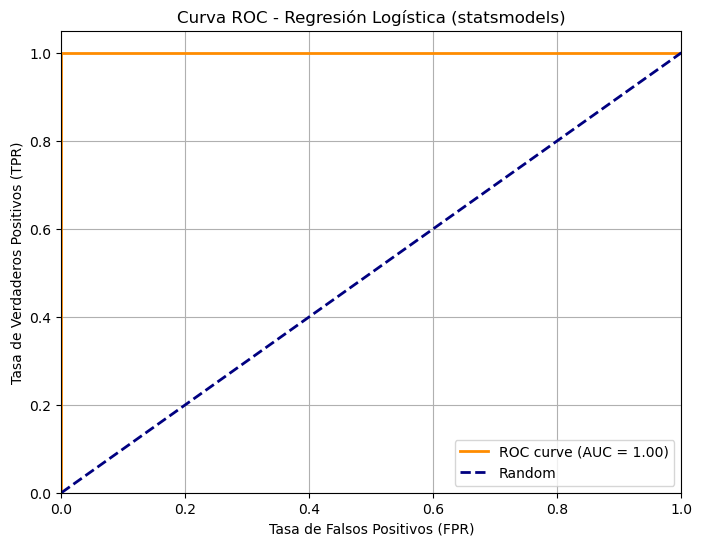

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 10. Calcular valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y, df["probabilidad"])
roc_auc = roc_auc_score(y, df["probabilidad"])

# 11. Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística (statsmodels)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()